In [30]:
import numpy as np
import pandas as pd # For data handling
import matplotlib.pyplot as plt  # For simple plots
import seaborn as sns#build on matplot to make the plain graph beautiful

In [18]:
df=pd.read_csv("ev_charging_patterns.csv")#read teh file
df

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,User_1316,Nissan Leaf,100.000000,Station_57,New York,2024-02-24 19:00:00,2024-02-24 20:30:00,42.011654,1.426444,5.895475,22.081164,Evening,Sunday,39.204102,83.915952,239.601075,1.919655,7.0,DC Fast Charger,Commuter
1316,User_1317,BMW i3,100.000000,Station_40,New York,2024-02-24 20:00:00,2024-02-24 20:44:00,68.185853,3.238212,18.388012,5.067806,Evening,Tuesday,31.456375,93.096461,164.376022,34.029775,4.0,Level 2,Casual Driver
1317,User_1318,Nissan Leaf,100.000000,Station_374,New York,2024-02-24 21:00:00,2024-02-24 23:03:00,18.895102,3.267122,45.482066,37.255002,Evening,Tuesday,71.903081,78.678879,226.519258,20.358761,5.0,DC Fast Charger,Commuter
1318,User_1319,Chevy Bolt,85.000000,Station_336,San Francisco,2024-02-24 22:00:00,2024-02-24 23:20:00,13.756252,2.754527,38.148183,39.046146,Afternoon,Sunday,76.187997,65.926573,291.494076,24.134598,5.0,Level 2,Commuter


In [19]:
df.shape#dimension

(1320, 20)

In [20]:
df.info()#understand the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

In [21]:
df.describe()#statical summaries

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
count,1320.000000,1254.000000,1320.000000,1254.000000,1320.000000,1320.000000,1320.000000,1254.000000,1320.000000,1320.000000
mean,74.534692,42.642894,2.269377,25.963003,22.551352,49.130012,75.141590,153.596788,15.263591,3.612843
std,20.626914,22.411705,1.061037,14.011326,10.751494,24.074134,17.080580,86.004987,14.831216,2.309824
min,1.532807,0.045772,0.095314,1.472549,0.234317,2.325959,7.604224,0.862361,-10.724770,0.000000
25%,62.000000,23.881193,1.397623,13.856583,13.368141,27.786903,62.053266,79.445335,2.800664,2.000000
50%,75.000000,42.691405,2.258136,25.603799,22.076360,48.241771,75.682496,152.259867,14.630846,4.000000
75%,85.000000,61.206218,3.112806,37.502998,31.646044,69.277921,88.201370,226.073284,27.981810,6.000000
max,193.003074,152.238758,7.635145,97.342255,69.407743,152.489761,177.708666,398.364775,73.169588,11.688592


In [22]:
# Fill missing numerical values with the column's mean
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:  # Check if column is numerical
        if df[column].isnull().sum() > 0:  # Check if it has missing values
            df[column] = df[column].fillna(df[column].mean())
            print(f"Filled missing values in {column} with mean")

# Check again to confirm no missing values
print("\nMissing values after filling:")
print(df.isnull().sum())

Filled missing values in Energy Consumed (kWh) with mean
Filled missing values in Charging Rate (kW) with mean
Filled missing values in Distance Driven (since last charge) (km) with mean

Missing values after filling:
User ID                                     0
Vehicle Model                               0
Battery Capacity (kWh)                      0
Charging Station ID                         0
Charging Station Location                   0
Charging Start Time                         0
Charging End Time                           0
Energy Consumed (kWh)                       0
Charging Duration (hours)                   0
Charging Rate (kW)                          0
Charging Cost (USD)                         0
Time of Day                                 0
Day of Week                                 0
State of Charge (Start %)                   0
State of Charge (End %)                     0
Distance Driven (since last charge) (km)    0
Temperature (°C)                            0


In [23]:
# Count occurrences of each vehicle model
print("Vehicle Model Counts:")
print(df['Vehicle Model'].value_counts())

# Count occurrences of each charging location
print("\nBattery Capacity (kWh) Counts:")
print(df['Battery Capacity (kWh)'].value_counts())


# Count occurrences of each charging location
print("\nCharging Station Location Counts:")
print(df['Charging Station Location'].value_counts())

# Count occurrences of each vehicle model
print("Time of Day Counts:")
print(df['Time of Day'].value_counts())


# Count occurrences of each vehicle model
print("Day of Week Counts:")
print(df['Day of Week'].value_counts())

# Count occurrences of each charging location
print("\nVehicle Age (years) Counts:")
print(df['Vehicle Age (years)'].value_counts())

# Count occurrences of each vehicle model
print("Charger Type Counts:")
print(df['Charger Type'].value_counts())

# Count occurrences of each charging location
print("\nUser Type Counts:")
print(df['User Type'].value_counts())

Vehicle Model Counts:
Vehicle Model
Tesla Model 3    280
Hyundai Kona     266
Nissan Leaf      260
BMW i3           258
Chevy Bolt       256
Name: count, dtype: int64

Battery Capacity (kWh) Counts:
Battery Capacity (kWh)
75.000000     248
62.000000     238
85.000000     235
100.000000    233
50.000000     224
             ... 
60.803164       1
81.062030       1
46.172873       1
129.350616      1
120.447195      1
Name: count, Length: 147, dtype: int64

Charging Station Location Counts:
Charging Station Location
Los Angeles      297
San Francisco    264
Houston          262
New York         255
Chicago          242
Name: count, dtype: int64
Time of Day Counts:
Time of Day
Evening      362
Morning      336
Night        312
Afternoon    310
Name: count, dtype: int64
Day of Week Counts:
Day of Week
Saturday     205
Tuesday      200
Wednesday    197
Sunday       191
Friday       188
Monday       185
Thursday     154
Name: count, dtype: int64

Vehicle Age (years) Counts:
Vehicle Age (year

In [24]:
# Fix invalid SOC: Cap End % at 100
df['State of Charge (End %)'] = df['State of Charge (End %)'].clip(upper=100)

# Convert date columns to datetime
df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'])
df['Charging End Time'] = pd.to_datetime(df['Charging End Time'])

# Calculate actual charging duration if needed (in hours)
df['Calculated Duration (hours)'] = (df['Charging End Time'] - df['Charging Start Time']).dt.total_seconds() / 3600

# Display cleaned data preview
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),...,Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,Calculated Duration (hours)
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,...,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter,0.650000
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,...,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver,2.016667
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,...,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter,2.800000
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,...,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler,3.700000
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,...,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler,1.766667


In [25]:
# Average energy consumed by location
avg_by_location = df.groupby('Charging Station Location')['Energy Consumed (kWh)'].mean().sort_values()
print("Average Energy Consumed by Location:\n", avg_by_location)

# Average charging cost by user type
avg_cost_by_user = df.groupby('User Type')['Charging Cost (USD)'].mean().sort_values()
print("\nAverage Charging Cost by User Type:\n", avg_cost_by_user)

# Count of charges by day of week
charges_by_day = df['Day of Week'].value_counts()
print("\nCharges by Day of Week:\n", charges_by_day)

# Average charging rate by charger type
avg_rate_by_charger = df.groupby('Charger Type')['Charging Rate (kW)'].mean().sort_values()
print("\nAverage Charging Rate by Charger Type:\n", avg_rate_by_charger)

Average Energy Consumed by Location:
 Charging Station Location
Los Angeles      41.474572
San Francisco    42.185657
New York         42.248293
Chicago          43.459274
Houston          44.058015
Name: Energy Consumed (kWh), dtype: float64

Average Charging Cost by User Type:
 User Type
Long-Distance Traveler    22.214583
Casual Driver             22.678176
Commuter                  22.752088
Name: Charging Cost (USD), dtype: float64

Charges by Day of Week:
 Day of Week
Saturday     205
Tuesday      200
Wednesday    197
Sunday       191
Friday       188
Monday       185
Thursday     154
Name: count, dtype: int64

Average Charging Rate by Charger Type:
 Charger Type
DC Fast Charger    25.574493
Level 1            25.998273
Level 2            26.313051
Name: Charging Rate (kW), dtype: float64


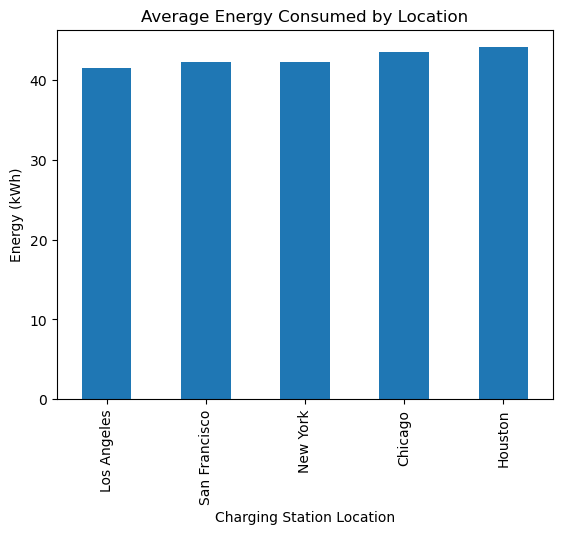

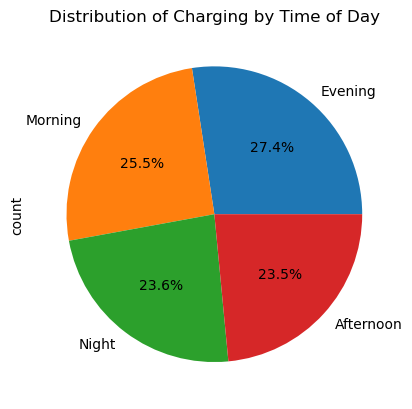

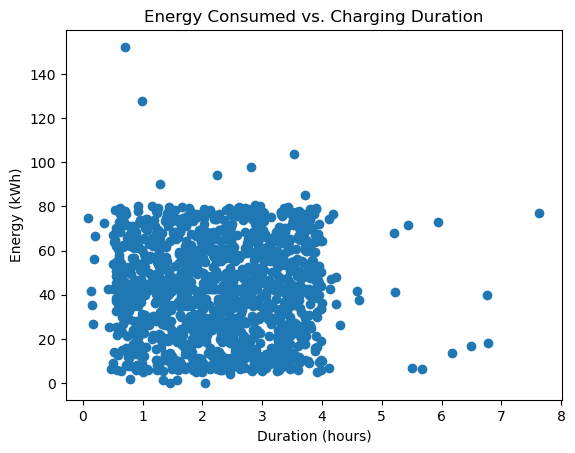

In [28]:
# Plot average energy by location
avg_by_location.plot(kind='bar', title='Average Energy Consumed by Location')
plt.ylabel('Energy (kWh)')
plt.show()

# Plot charges by time of day
df['Time of Day'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Distribution of Charging by Time of Day')
plt.show()

# Scatter plot: Energy vs. Duration
plt.scatter(df['Charging Duration (hours)'], df['Energy Consumed (kWh)'])
plt.xlabel('Duration (hours)')
plt.ylabel('Energy (kWh)')
plt.title('Energy Consumed vs. Charging Duration')
plt.show()

In [32]:
# Select numerical columns
numerical_cols = [
    'Battery Capacity (kWh)', 
    'Energy Consumed (kWh)', 
    'Charging Duration (hours)', 
    'Charging Rate (kW)', 
    'Charging Cost (USD)', 
    'State of Charge (Start %)', 
    'State of Charge (End %)', 
    'Distance Driven (since last charge) (km)', 
    'Temperature (°C)', 
    'Vehicle Age (years)'
]

# Create a correlation matrix
corr_matrix = df[numerical_cols].corr()

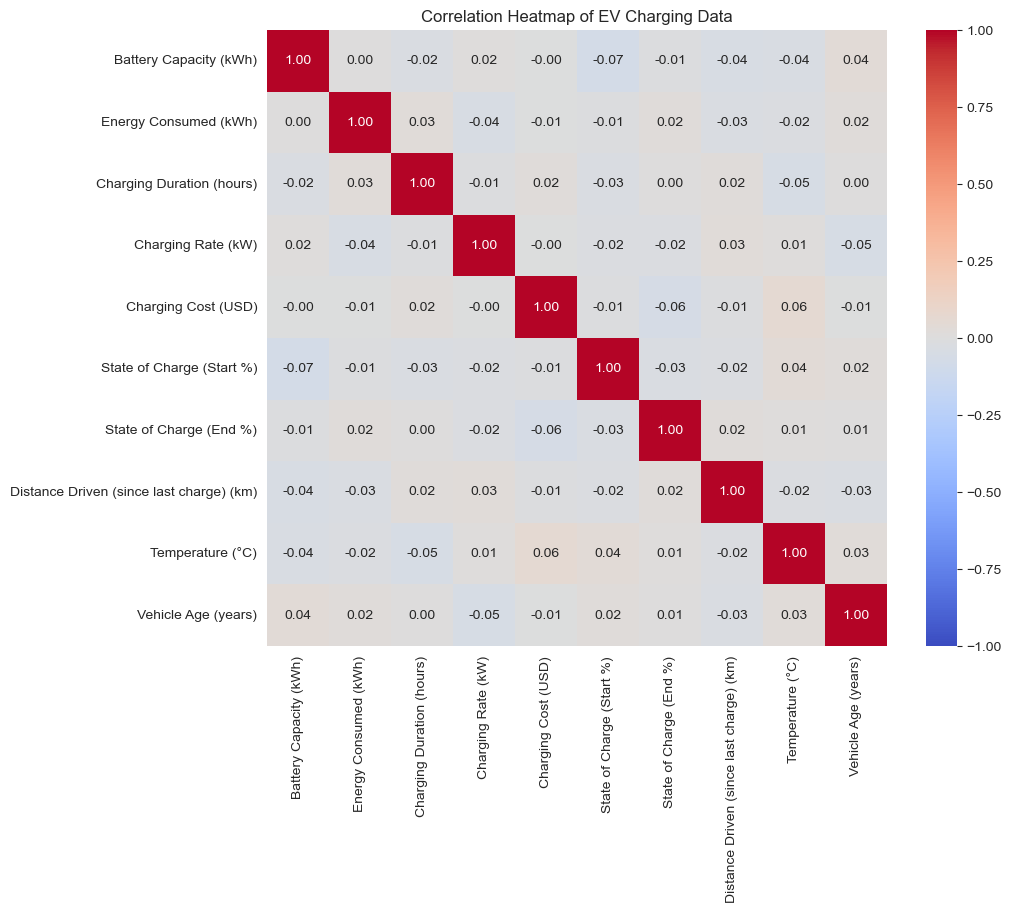

In [33]:
# Set the figure size for better readability
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# Add a title
plt.title('Correlation Heatmap of EV Charging Data')

# Show the plot
plt.show()

In [35]:
# Calculate energy efficiency (km/kWh)
df['Energy Efficiency (km/kWh)'] = df['Distance Driven (since last charge) (km)'] / df['Energy Consumed (kWh)']

# Display the first few rows to check
print("Sample of Energy Efficiency (km/kWh):")
print(df[['User ID', 'Vehicle Model', 'Distance Driven (since last charge) (km)', 'Energy Consumed (kWh)', 'Energy Efficiency (km/kWh)']].head())

# Average efficiency across all vehicles
print("\nAverage Energy Efficiency (km/kWh):")
print(df['Energy Efficiency (km/kWh)'].mean())

# Average efficiency by vehicle model
print("\nAverage Energy Efficiency by Vehicle Model (km/kWh):")
print(df.groupby('Vehicle Model')['Energy Efficiency (km/kWh)'].mean())   

Sample of Energy Efficiency (km/kWh):
  User ID Vehicle Model  Distance Driven (since last charge) (km)  \
0  User_1        BMW i3                                293.602111   
1  User_2  Hyundai Kona                                112.112804   
2  User_3    Chevy Bolt                                 71.799253   
3  User_4  Hyundai Kona                                199.577785   
4  User_5  Hyundai Kona                                203.661847   

   Energy Consumed (kWh)  Energy Efficiency (km/kWh)  
0              60.712346                    4.835954  
1              12.339275                    9.085850  
2              19.128876                    3.753449  
3              79.457824                    2.511745  
4              19.629104                   10.375504  

Average Energy Efficiency (km/kWh):
10.921496993909924

Average Energy Efficiency by Vehicle Model (km/kWh):
Vehicle Model
BMW i3           28.904254
Chevy Bolt        6.549410
Hyundai Kona      5.963427
Nissan Leaf 

In [36]:
# Save cleaned CSV
df.to_csv('cleaned_ev_charging_patterns.csv', index=False)

# Save summary stats to Excel
df.describe().to_excel('ev_summary_stats.xlsx')